In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Activation,Input,Lambda,Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization

In [2]:
import os

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
import pydot

In [6]:
def build_model(input_size = (224,224)):
    
    vgg_19 = load_model("vgg-19.h5")
    
    linput = Input(shape = (input_size[0], input_size[1], 3))
    rinput = Input(shape = (input_size[0], input_size[1], 3))
    

    r = vgg_19.layers[1](rinput)
    r = vgg_19.layers[2](r)
    r = vgg_19.layers[3](r)
    r = vgg_19.layers[4](r)
    r = vgg_19.layers[5](r)
    r = vgg_19.layers[6](r)
    
    l = vgg_19.layers[1](linput)
    l = vgg_19.layers[2](l)
    l = vgg_19.layers[3](l)
    l = vgg_19.layers[4](l)
    l = vgg_19.layers[5](l)
    l = vgg_19.layers[6](l)
    
    dist = Lambda((lambda tensors:tf.abs(tensors[0] - tensors[1])))([r,l])
    
    classifier = Flatten()(dist)
    
    classifier = Dense(256 , activation = "relu")(classifier)
    classifier = Dense(128 , activation = "relu")(classifier)
    classifier = Dense(64 , activation = "relu")(classifier)
    classifier = Dense(32 , activation = "relu")(classifier)
    classifier = Dense(1 , activation = "sigmoid")(classifier)
    
    model = Model(inputs = (linput,rinput) , outputs = (classifier) )
    
    model.layers[2].trainable = False
    model.layers[3].trainable = False
    model.layers[4].trainable = False
    
    model.compile(optimizer = tf.keras.optimizers.Adam() , loss = "binary_crossentropy" , metrics = ["accuracy"] )
    
    
    return model
    

In [7]:
model = build_model(input_size=(224,224))

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 224, 224, 64) 1792        input_2[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 224, 224, 64) 36928       conv2d_44[1][0]              

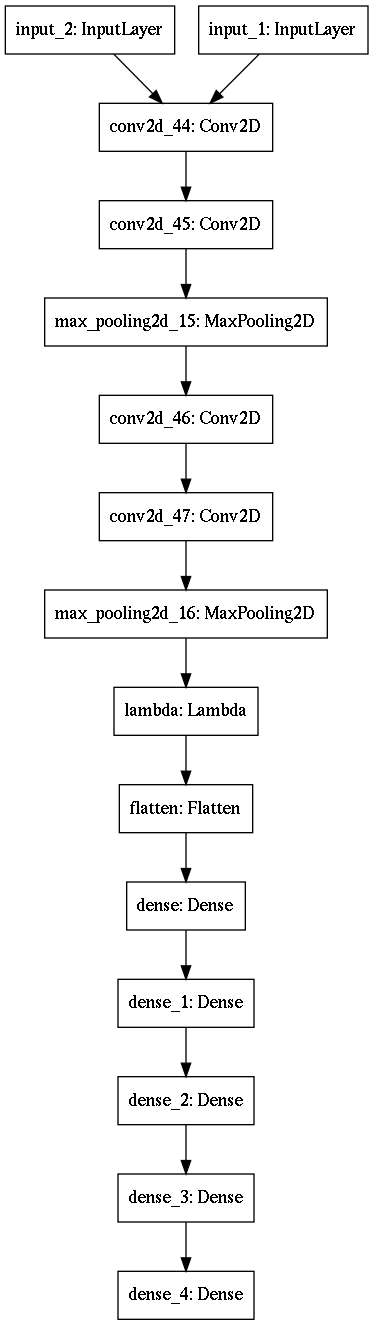

In [9]:
tf.keras.utils.plot_model(model)

In [10]:
def get_images(directory,input_size):
    
    images = []
    
    for image in os.listdir(directory):
        
        
        images.append(np.asarray(Image.fromarray(np.array(plt.imread(directory + "/" + image))).resize(input_size))/255)
        
    return np.array(images)

In [11]:
images = get_images("EgyptImages/",(224,224))

In [12]:
len(images)

6

In [13]:
limages = images[0:3]

In [14]:
rimages = images[3:]

In [15]:
model.predict((limages,rimages))

array([[0.5736473 ],
       [0.66300744],
       [0.5870848 ]], dtype=float32)

In [16]:
model.save("siameese.h5")